In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

## Loading the datasets 

In [53]:
data = pd.read_csv("OnlineNewsPopularity.csv")

## Exploring the data

In [54]:
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',100)

In [55]:
data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [56]:
data.shape

(39644, 61)

In [57]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [58]:
data.dtypes

url                                object
timedelta                         float64
n_tokens_title                    float64
n_tokens_content                  float64
n_unique_tokens                   float64
n_non_stop_words                  float64
n_non_stop_unique_tokens          float64
num_hrefs                         float64
num_self_hrefs                    float64
num_imgs                          float64
num_videos                        float64
average_token_length              float64
num_keywords                      float64
data_channel_is_lifestyle         float64
 data_channel_is_entertainment    float64
data_channel_is_bus               float64
data_channel_is_socmed            float64
data_channel_is_tech              float64
data_channel_is_world             float64
kw_min_min                        float64
kw_max_min                        float64
kw_avg_min                        float64
kw_min_max                        float64
kw_max_max                        

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

In [60]:
#Encoding the target variable by threshold 100
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['shares'] = pd.Series(label_encoder.fit_transform(data.shares>=3395))

In [61]:
#Get features from the dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]],axis=1)
features_raw.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


## Visualize the feature of different day of week


In [62]:
columns_day = features_raw.columns.values[29:36]
print(columns_day)
unpop = data[data['shares']== 0]
pop = data[data['shares'] != 0]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

['weekday_is_monday' 'weekday_is_tuesday' 'weekday_is_wednesday'
 'weekday_is_thursday' 'weekday_is_friday' 'weekday_is_saturday'
 'weekday_is_sunday']


In [63]:
unpop_day

array([5314., 6013., 6042., 5894., 4559., 1777., 1966.])

In [64]:
pop_day

array([1347., 1377., 1393., 1373., 1142.,  676.,  771.])

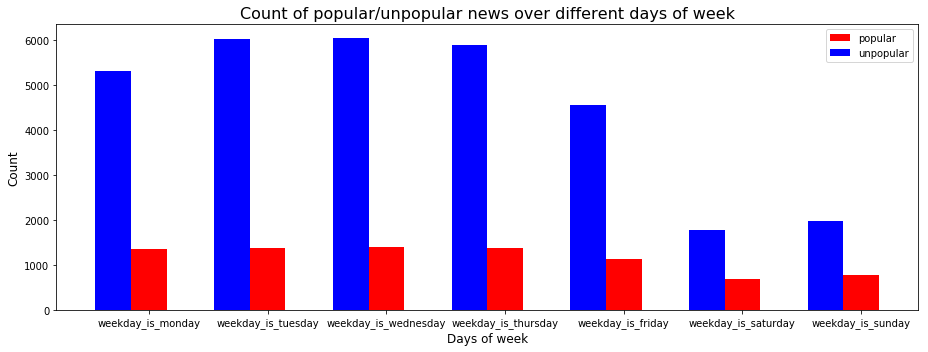

In [65]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different days of week",fontsize =16)
plt.bar(np.arange(len(columns_day)),pop_day,width = 0.3, align='center',color ='r',label = 'popular')
plt.bar(np.arange(len(columns_day)) - 0.3 ,unpop_day,width = 0.3, align='center',color ='b',label = 'unpopular')
plt.xticks(np.arange(len(columns_day)),columns_day)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Days of week",fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()

## Visualize the feature of different category

In [66]:
column_chans = features_raw.columns.values[11:17]
print(column_chans)
unpop_ch =unpop[column_chans].sum().values
pop_ch = pop[column_chans].sum().values

['data_channel_is_lifestyle' ' data_channel_is_entertainment'
 'data_channel_is_bus' 'data_channel_is_socmed' 'data_channel_is_tech'
 'data_channel_is_world']


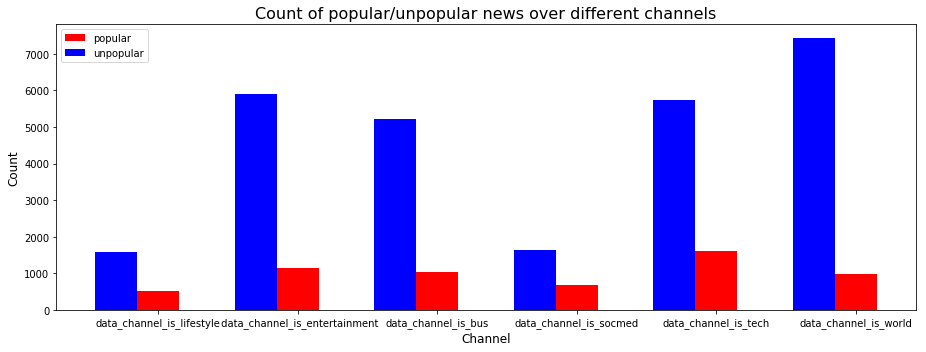

In [67]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different channels",fontsize =16)
plt.bar(np.arange(len(column_chans)),pop_ch,width = 0.3, align='center',color ='r',label = 'popular')
plt.bar(np.arange(len(column_chans)) - 0.3 ,unpop_ch,width = 0.3, align='center',color ='b',label = 'unpopular')
plt.xticks(np.arange(len(column_chans)),column_chans)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Channel",fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("channels.pdf")
plt.show()

In [68]:
relevant = data[['n_unique_tokens','num_hrefs','num_videos','data_channel_is_lifestyle','data_channel_is_socmed','kw_min_min',
        'kw_min_max','kw_min_avg','self_reference_min_shares','weekday_is_monday','weekday_is_thursday','weekday_is_sunday',
        'LDA_01','LDA_04','global_rate_positive_words','rate_negative_words','max_positive_polarity','max_negative_polarity',
        'abs_title_subjectivity','shares']]

In [69]:
len(relevant.keys())

20

## Spliting Train and Test data

In [70]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(relevant,test_size=0.2,random_state=85)

X_train = train.iloc[:,0:19]
Y_train = train.iloc[:,19]
X_test = test.iloc[:,0:19]
Y_test = test.iloc[:,19]

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit(X_train).transform(X_train)

In [73]:
X_test = scaler.transform(X_test)

In [74]:
pca = PCA(n_components=2,svd_solver="arpack")

In [75]:
X_train =  pca.fit(X_train).transform(X_train)

In [76]:
X_test = pca.transform(X_test)

## Applying Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
model.intercept_

0.20375216774396973

In [81]:
y_pred = model.predict(X_test)

In [82]:
from sklearn import metrics

In [83]:
metrics.accuracy_score(y_pred.astype(int),Y_test)

0.796065077563375

In [84]:
metrics.mean_squared_error(y_pred,Y_test)

0.16230814825333081

In [85]:
pca.explained_variance_ratio_

array([0.1748364, 0.1430581])

### With Linear Regression Accuracy is 79.6%

# Applying Logistic Regression

In [86]:
LogisticR = LogisticRegression()

In [87]:
LogisticR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
lr_pred = LogisticR.predict(X_test)
print(metrics.accuracy_score(lr_pred,Y_test)*100,'%')

79.60650775633749 %


### With Logistic Regression Accuracy is 79.6% 

# Applying Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier()

In [92]:
dt_pred = dt.fit(X_train,Y_train).predict(X_test)
print(metrics.accuracy_score(dt_pred,Y_test)*100,'%')

68.45756085256653 %


### Decision tree model accuracy is 68.5%

# Applying Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=1000,criterion='gini')

In [96]:
rfc_pred = rfc.fit(X_train,Y_train).predict(X_test)
print(metrics.accuracy_score(rfc_pred,Y_test)*100,'%')

76.6553159288687 %


### With Random Forest Accuracy is 76.6%

# Applying SVM

In [104]:
from sklearn import svm

In [109]:
svmclf = svm.SVC()

In [111]:
svmclf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
y_svm_pred = svmclf.predict(X_test)

In [113]:
print(metrics.accuracy_score(y_svm_pred,Y_test)*100,'%')

79.60650775633749 %


### With SVM Accuracy is 79.6%